In [1]:
#OMC mode scan peak identification / PZT linearization

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import argrelextrema
import peakutils

%matplotlib inline

In [3]:
#OMC parameters (LLO)
fsr = 264.8               # [MHz]
tmsH = 57.95            # [MHz]
tmsV = 58.10           # [MHz]
tms  = (tmsH+tmsV)/2;        # [MHz]
fmod1= 9.1002293;              # [MHz]
fmod5= fmod1*5;     

In [4]:
#Importing Mode Scan data from text file
data = np.loadtxt("/Users/daniel_vander-hyde/Documents/python/OMC_mode_scan/omc_scans.nosync/OMC_SCAN_11_09_2018_darm_offset.txt")

(array([1638399]),)
(array([1638400]),)


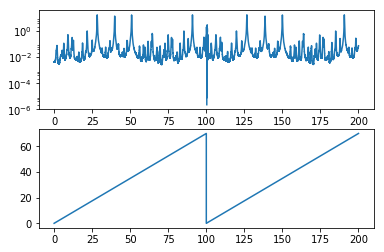

In [5]:
#Plotting entire time series of scan

#Organize data
TIM = data[:,0]
OMC = data[:,1]
PZT = data[:,2]

#Plotting all OMC data
fig1= plt.figure(figsize=(9, 7), dpi=80)
f, ax = plt.subplots(2)
ax[0].semilogy(TIM,OMC)

#Plotting all PZT data
ax[1].plot(data[:,0],PZT)
maxima = argrelextrema(PZT,np.greater)
print(maxima)
minima = argrelextrema(PZT,np.less)
print(minima)
PZT_max = [PZT[i] for i in maxima]
PZT_min=  [PZT[i] for i in minima]


[ 463795  834093 1489387]


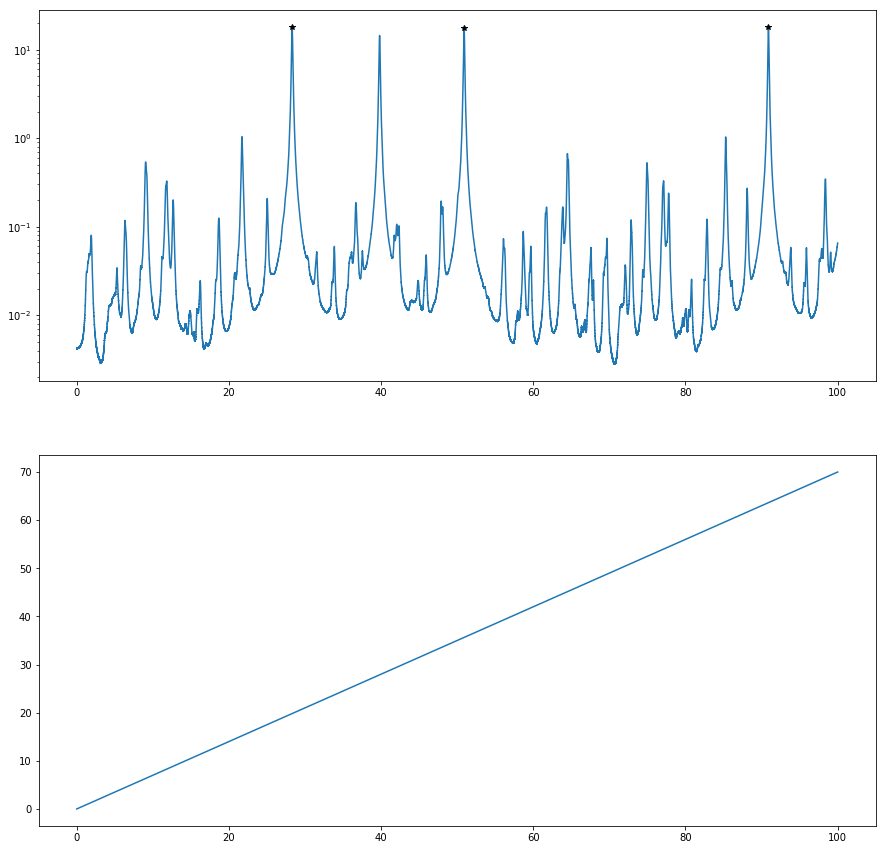

In [7]:
#Grabbing a linear region of the PZT drive

end_lin = min(TIM, key=lambda x:abs(x-100))
end_lin_ind = np.where(TIM==end_lin)[0][0]

TIM_trunc = TIM[:end_lin_ind]
OMC_trunc = OMC[:end_lin_ind]
PZT_trunc = PZT[:end_lin_ind]

#Plotting mode scan

f, ax = plt.subplots(2, figsize = (15,15))

#Peak finding in the mode scan (believe this is the 45 MHz sideband)
peak_unique = peakutils.indexes(OMC_trunc, thres= .9, min_dist= 30)

SB45_peak_time = [TIM_trunc[i] for i in peak_unique]
#trunc_list_1 = [i for i in peak_unique if OMC_trunc[i] > 0]
SB45_peak_amp = [OMC_trunc[t] for t in peak_unique]
SB45_peak_pzt = [PZT_trunc[t] for t in peak_unique]
## Not all points are unique

ax[0].semilogy(TIM_trunc, OMC_trunc)
ax[0].semilogy(SB45_peak_time,SB45_peak_amp,'*k')

ax[1].plot(TIM_trunc, PZT_trunc)
print(peak_unique)
    

In [8]:
## get the frequency spread
freq_45SB = [-45, 45, -45+fsr]
PZT_fit = PZT_trunc[peak_unique]

## polyfit OMC scan with frequency spread
coeff = np.polyfit(PZT_fit,freq_45SB,2)

print(coeff)
print(freq_45SB)

[  1.26611632e-02   4.98661580e+00  -1.48783523e+02]
[-45, 45, 219.8]


In [173]:
frq = np.polyval(coeff,PZT_trunc)

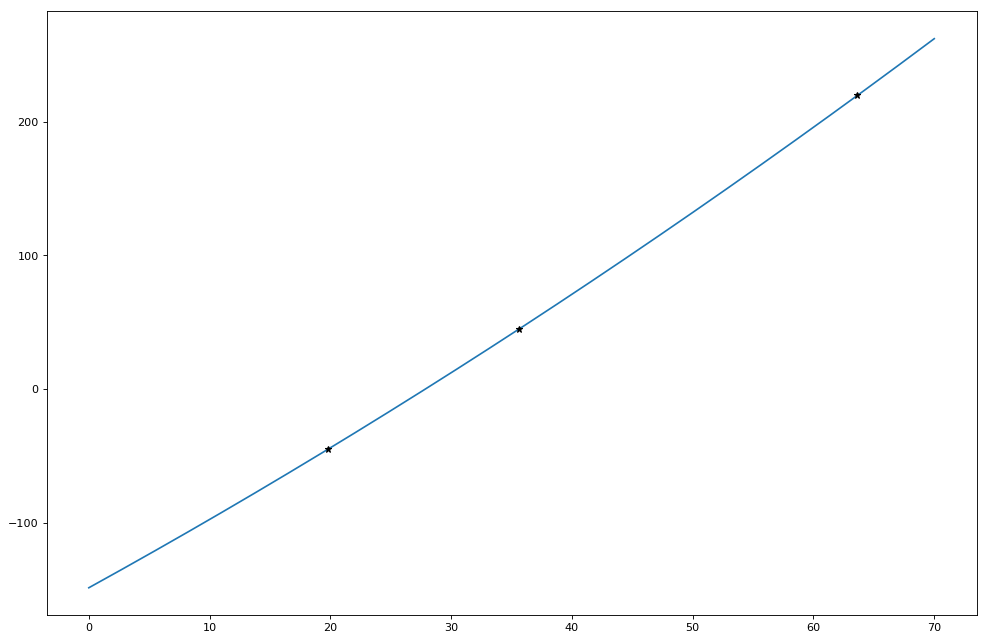

In [181]:
fig7 = plt.figure(figsize=(15, 10), dpi=80)
SB45_peak_frq = [frq[t] for t in peak_unique]
plt.plot(PZT_trunc,frq)
plt.plot(SB45_peak_pzt ,SB45_peak_frq,'*k')


In [195]:
## Finding the 9MHz pair
array_9MHz = [(-9), 9, (-9+fsr)]
ind_9MHz = [i*0 for i in range(len(array_9MHz))]
for i in range(len(array_9MHz)): 
    loc_SB9 = min(frq, key=lambda x:abs(x-array_9MHz[i]))
    print(loc_SB9)
    loc_SB9_ind= np.where(frq==loc_SB9)[0][0]
    ind_9MHz[i] = loc_SB9_ind
    print(ind_9MHz[i])
    

SB9_peak_frq = [frq[t] for t in ind_9MHz]
SB9_peak_pzt = [PZT_trunc[t] for t in ind_9MHz]
SB9_peak_amp = [OMC_trunc[t] for t in ind_9MHz]
SB9_peak_time = [TIM_trunc[t] for t in ind_9MHz]


-8.99994950563
615065
8.99991218649
689080
255.79995989
1615784


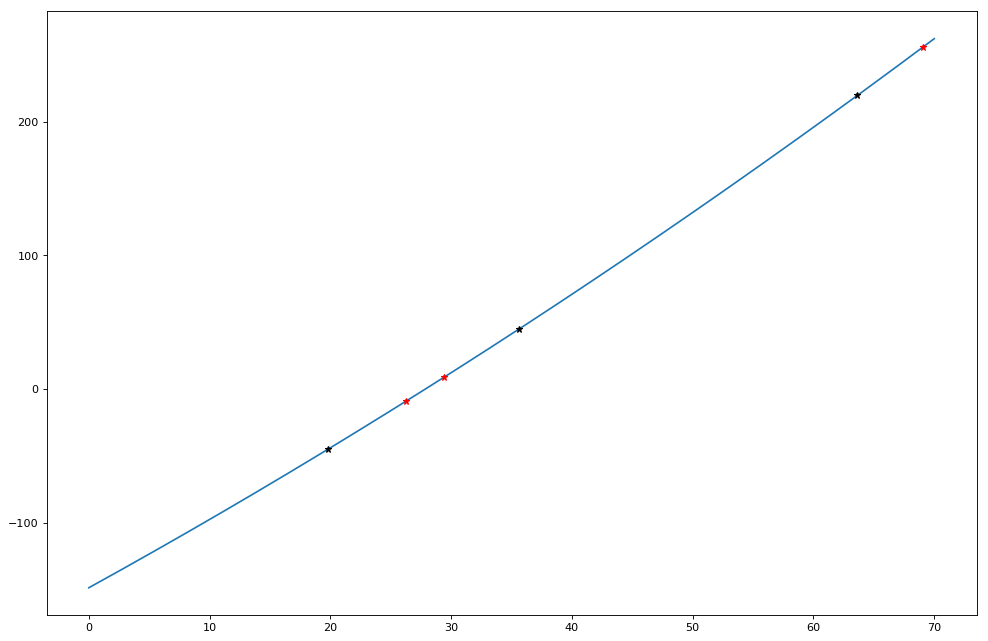

In [184]:
fig8 = plt.figure(figsize=(15, 10), dpi=80)
plt.plot(PZT_trunc,frq)
plt.plot(SB45_peak_pzt ,SB45_peak_frq,'*k')
plt.plot(SB9_peak_pzt, SB9_peak_frq, '*r')


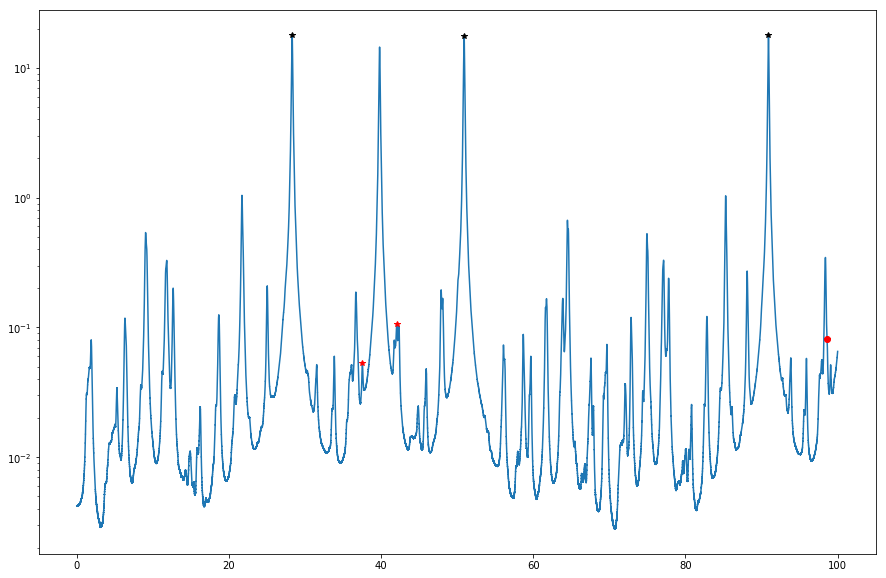

In [190]:
fig9 = plt.figure(figsize=(15,10))
plt.semilogy(TIM_trunc, OMC_trunc)
plt.semilogy(SB45_peak_time, SB45_peak_amp, '*k')
plt.semilogy(SB9_peak_time, SB9_peak_amp, '*r')
plt.semilogy(SB9_peak_time[2],SB9_peak_amp[2], 'or' ) #Doesn't seem right

6.25091155371e-05
652203
262.31871508
1638398


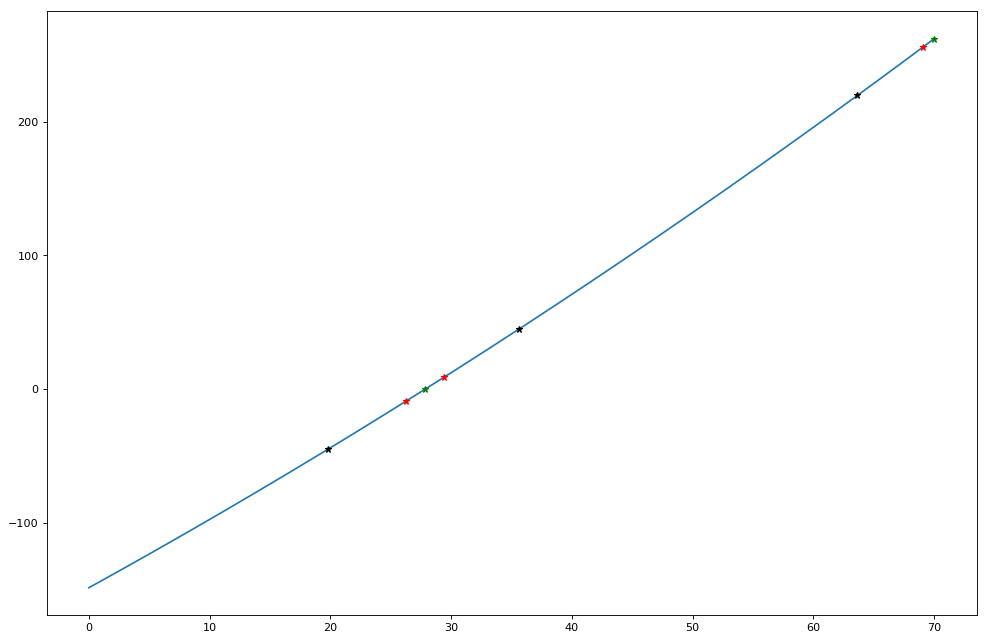

In [192]:
## Finding the carrier
array_car = [0, fsr]
ind_car = [i*0 for i in range(len(array_car))]
for i in range(len(array_car)): 
    loc_car = min(frq, key=lambda x:abs(x-array_car[i]))
    print(loc_car)
    loc_car_ind= np.where(frq==loc_car)[0][0]
    ind_car[i] = loc_car_ind
    print(ind_car[i])
    
car_peak_frq = [frq[t] for t in ind_car]
car_peak_pzt = [PZT_trunc[t] for t in ind_car]
car_peak_amp = [OMC_trunc[t] for t in ind_car]
car_peak_time = [TIM_trunc[t] for t in ind_car]
fig8 = plt.figure(figsize=(15, 10), dpi=80)
plt.plot(PZT_trunc,frq)
plt.plot(SB45_peak_pzt ,SB45_peak_frq,'*k')
plt.plot(SB9_peak_pzt, SB9_peak_frq, '*r')
plt.plot(car_peak_pzt, car_peak_frq, '*g')


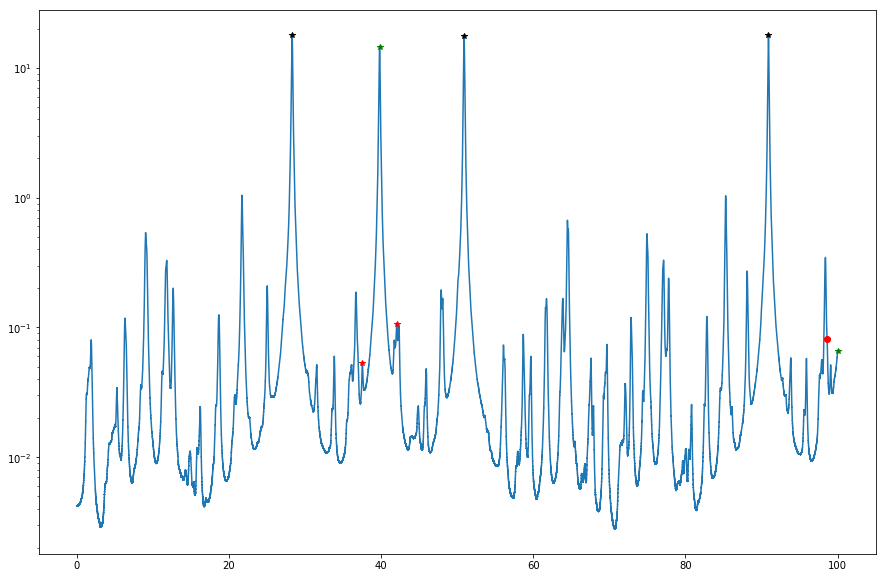

In [194]:
fig9 = plt.figure(figsize=(15,10))
plt.semilogy(TIM_trunc, OMC_trunc)
plt.semilogy(SB45_peak_time, SB45_peak_amp, '*k')
plt.semilogy(SB9_peak_time, SB9_peak_amp, '*r')
plt.semilogy(SB9_peak_time[2],SB9_peak_amp[2], 'or' ) #Doesn't seem right
plt.semilogy(car_peak_time, car_peak_amp, '*g')

In [ ]:
# Higher order modes
